In [1]:
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import  LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

# Exploratory Data Analysis

[Ames House Dataset](https://www.kaggle.com/prevek18/ames-housing-dataset)

In [2]:
# Importing a dataset cleaned and preraded in prior project about Ames Housing.
dataset = pd.read_csv('./renato_ames_housing.csv')
dataset

,Unnamed: 0,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,20,141.0,31770,0,6,5,1960,1960,112.0,...,0,0,0,1,0,0,0,0,1,0
1,1,20,80.0,11622,0,5,6,1961,1961,0.0,...,0,0,0,1,0,0,0,0,1,0
2,2,20,81.0,14267,0,6,6,1958,1958,108.0,...,0,0,0,1,0,0,0,0,1,0
3,3,20,93.0,11160,0,7,5,1968,1968,0.0,...,0,0,0,1,0,0,0,0,1,0
4,4,60,74.0,13830,0,5,5,1997,1998,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2920,2920,80,37.0,7937,0,6,6,1984,1984,0.0,...,0,0,0,1,0,0,0,0,1,0
2921,2921,20,0.0,8885,1,5,5,1983,1983,0.0,...,0,0,0,1,0,0,0,0,1,0
2922,2922,85,62.0,10441,0,5,5,1992,1992,0.0,...,0,0,0,1,0,0,0,0,1,0
2923,2923,20,77.0,10010,1,5,5,1974,1975,0.0,...,0,0,0,1,0,0,0,0,1,0


In [3]:
dataset = dataset.drop('Unnamed: 0', axis =1)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2925 entries, 0 to 2924
Columns: 243 entries, MS SubClass to Sale Condition_Partial
dtypes: float64(10), int64(233)
memory usage: 5.4 MB


In [5]:
dataset.describe()

,MS SubClass,Lot Frontage,Lot Area,Land Slope,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,...,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_Abnorml,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
count,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,...,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000,2925.000000
mean,57.396581,57.460855,10103.583590,0.053675,6.088205,5.563761,1971.302906,1984.234188,99.918632,2.396239,...,0.080684,0.002393,0.000342,0.866325,0.064615,0.004103,0.008205,0.015726,0.824615,0.082735
std,42.668752,33.075613,7781.999124,0.248506,1.402953,1.112262,30.242474,20.861774,175.566155,0.577674,...,0.272395,0.048870,0.018490,0.340361,0.245888,0.063931,0.090225,0.124437,0.380361,0.275528
min,20.000000,0.000000,1300.000000,0.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,43.000000,7438.000000,0.000000,5.000000,5.000000,1954.000000,1965.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,50.000000,63.000000,9428.000000,0.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,70.000000,78.000000,11515.000000,0.000000,7.000000,6.000000,2001.000000,2004.000000,162.000000,3.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,190.000000,313.000000,215245.000000,2.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
dataset.columns

Index(['MS SubClass', 'Lot Frontage', 'Lot Area', 'Land Slope', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Exter Qual',
       ...
       'Sale Type_New', 'Sale Type_Oth', 'Sale Type_VWD', 'Sale Type_WD ',
       'Sale Condition_Abnorml', 'Sale Condition_AdjLand',
       'Sale Condition_Alloca', 'Sale Condition_Family',
       'Sale Condition_Normal', 'Sale Condition_Partial'],
      dtype='object', length=243)

In [7]:
dataset.dtypes

MS SubClass                 int64
Lot Frontage              float64
Lot Area                    int64
Land Slope                  int64
Overall Qual                int64
                           ...   
Sale Condition_AdjLand      int64
Sale Condition_Alloca       int64
Sale Condition_Family       int64
Sale Condition_Normal       int64
Sale Condition_Partial      int64
Length: 243, dtype: object

# Split dataset

In [8]:
dataset_saved = dataset.copy()

In [9]:
X = dataset.drop(['SalePrice'],axis=1)
y = dataset['SalePrice']

In [10]:
X.shape

(2925, 242)

In [11]:
y.shape

(2925,)

In [12]:
#scale the data
s = StandardScaler()
X = s.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y)

In [13]:
X_train.shape

(2193, 242)

In [14]:
X_test.shape

(732, 242)

In [15]:
y_train.shape

(2193,)

In [16]:
y_test.shape

(732,)

# Prediction and Evaluate the Model Performance

Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

In [17]:
# Average
ypred_null = y_train.mean()

In [18]:
# K-Neighbours Regressor
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train,y_train)

y_pred_knn = knn.predict(X_test)

In [19]:
# Random Forrest Regression
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

In [20]:
# Lasso Regression
lasso = Lasso()
lasso.fit(X_train,y_train)
y_pred_las = lasso.predict(X_test)

In [21]:
model_rmse=pd.DataFrame(columns=['RMSE'])
model_rmse.loc['KNN','RMSE']=np.sqrt(mean_squared_error(y_test,y_pred_knn))
model_rmse.loc['RF','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred_rf))
model_rmse.loc['Lasso','RMSE'] = np.sqrt(mean_squared_error(y_test,y_pred_las))
model_rmse.loc['NULL','RMSE'] = ypred_null
model_rmse

,RMSE
KNN,31959.6
RF,25378.8
Lasso,21313.5
NULL,180282


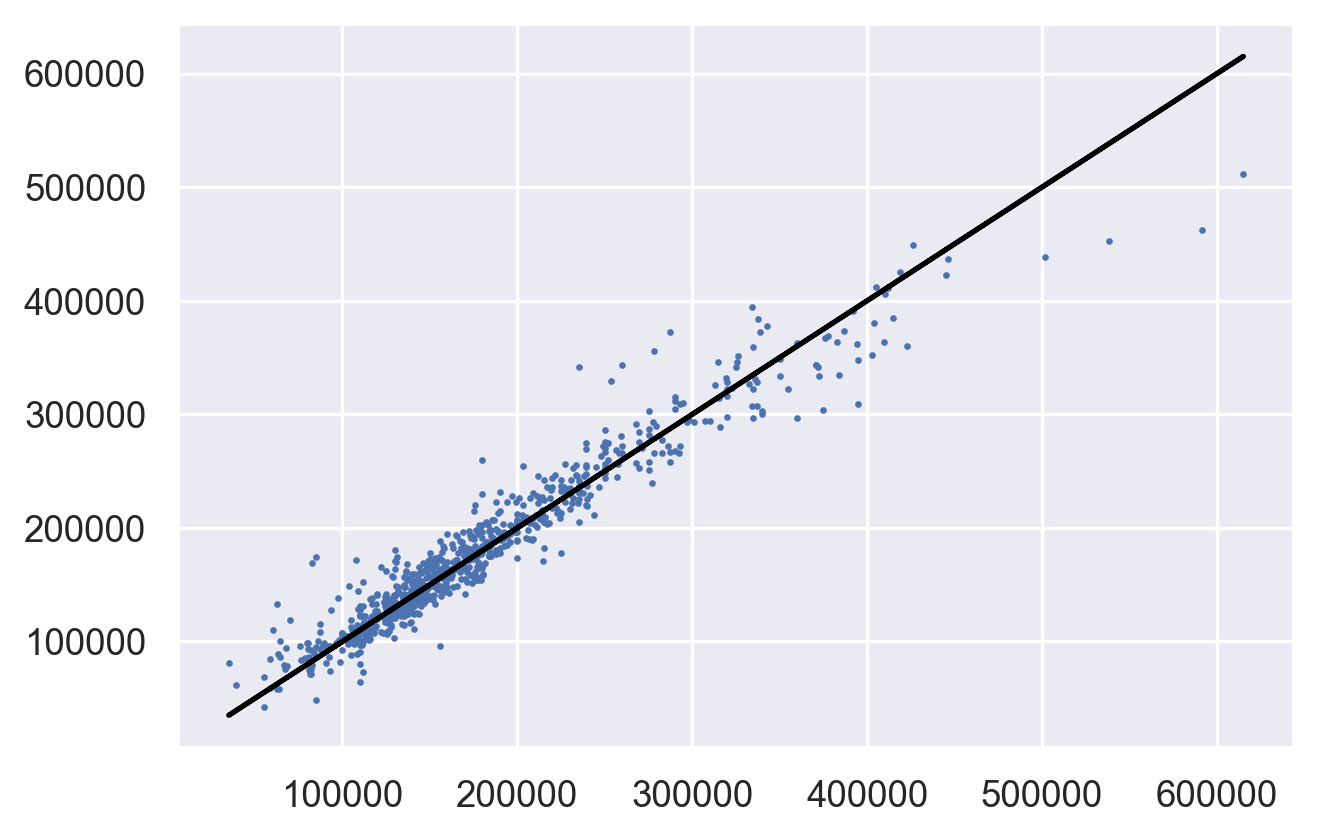

In [22]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(y_test,y_pred_las,s=1) # price and prediction scatterplot
ax.plot(y_test,y_test,color='black'); # red line

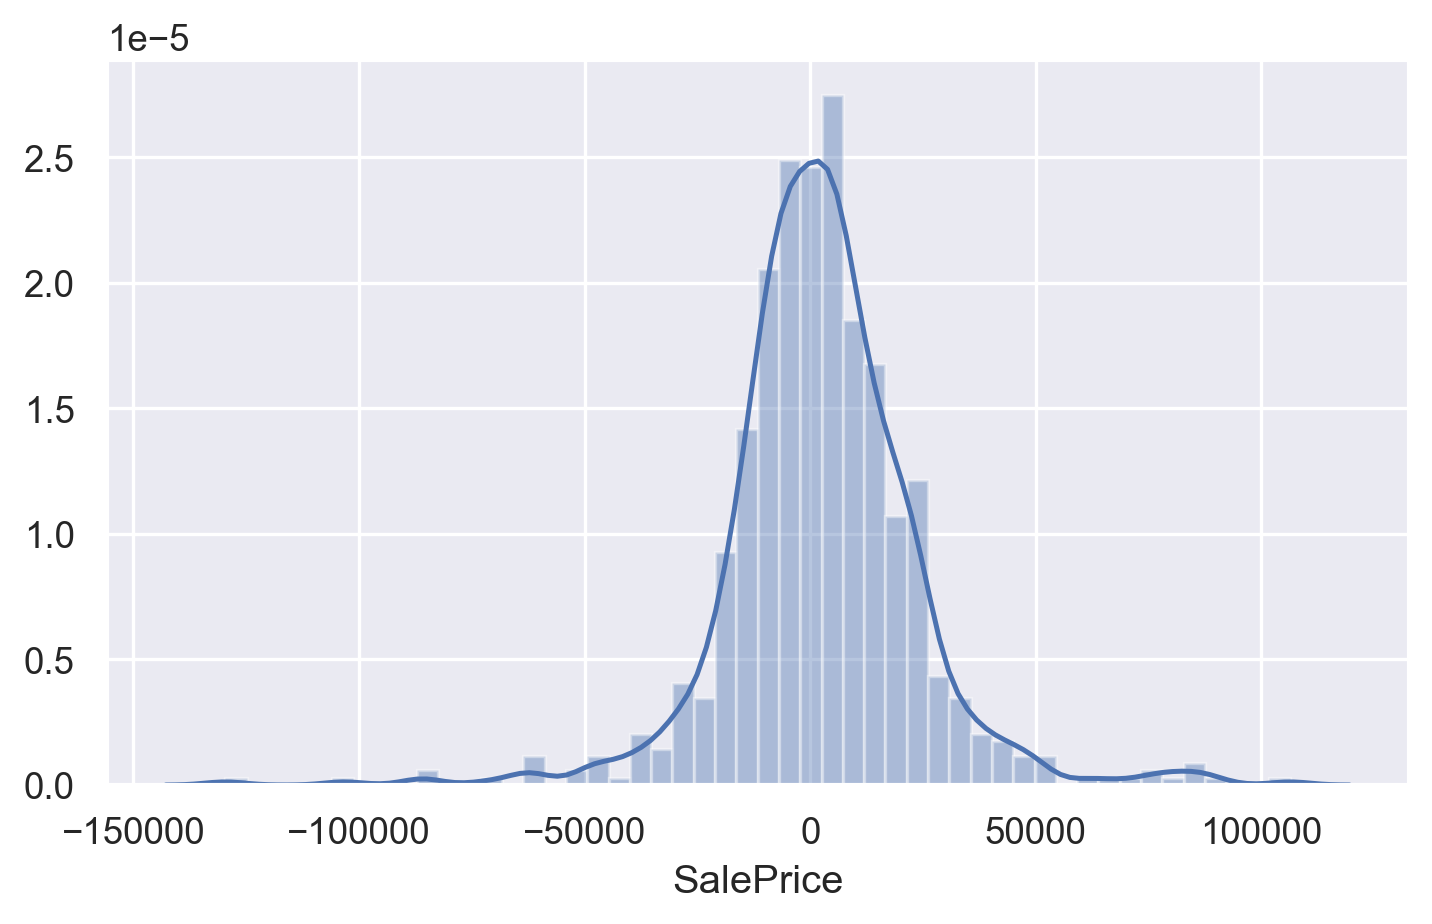

In [23]:
sns.distplot(y_pred_las-y_test);

In [24]:
# Power BI Python Script

# import pandas as pd
# from sklearn.linear_model import  Lasso
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# lasso = Lasso()
# X = dataset.drop(['SalePrice'],axis=1)
# y = dataset['SalePrice']
# s = StandardScaler()
# X = s.fit_transform(X)
# X_train,X_test,y_train,y_test = train_test_split(X,y)
# lasso.fit(X_train,y_train)
# dataset['prediction'] = lasso.predict(X)